# Kwantowe efekty w układach atomów i fotonów
**Warsztaty Cyfrowa NanoNauka**   
link: [cnn.fizyka.umk.pl](http://cnn.fizyka.umk.pl/)  

dr Tomasz Wasak  
Uniwersytet Mikołaja Kopernika w Toruniu  
Wydział Fizyki, Astronomii i Informatyki Stosowanej  
ul. Grudziądzka 5  
87-100 Toruń  
email: twasak@umk.pl

### Instrukcja obsługi

Każdą komórkę można kliknąć i nacisnąc przycisk "Run" albo nacisnąć kombinację klawiszy *Shift+Enter*.  
Uruchomiony zostanie program, który po zakończeniu działania przedstawi jakiś wynik.  
W programach można zmieniać wszystko, aby sprawdzić kiedy się popsują!

# 1. O zmiennych losowych

Komputery nie tylko pozwoliły na dokładne obliczenia i symulacje trudnych numerycznie zagadnień, lecz dały dostęp do analizy zjawisk, które rządzą się rachunkiem prawdopodobieństwa. U podstaw mechaniki kwantowej leżą zjawiska, które oparte są o losowość.

Sprawdźmy najpierw jednak, jak można na komputerze generować i opisywać zjawiska losowe.

## 1.1 Zmienna binarna

Wyobraźmy sobie losowy ciąg liczb 0 i 1.  
Mógłby wyglądać tak:

In [10]:
# Importujemy maszynkę do generowania liczb losowych w Pythonie, tj. moduł numpy
# jest też moduł scipy, ale dla prostoty wykorzystamy tutaj numpy
import numpy as np

# Obiekt, który generuje liczby losowe ma bardzo 'przyjazną' nazwę "random.default_rng".
# Ustawiamy tzw. "seed", który jest daną wejściową, na podstawie której generowane są liczby.
# Naszą maszynkę nazwiemy "generator", ale nazwa mogłąby być dowolna.
# Można również nie ustawiać żadnego seedu, wtedy wybierze się automatycznie.
seed = 12345
generator = np.random.default_rng(seed)

# ustawiamy seed tylko dlatego, żebyście zobaczyli, to co ja. Możecie ustawić dowolnie inny.

Wylosujmy teraz kilka (tutaj 100) liczb.

In [11]:
# Ustalmy najpierw ile chcemy wygenerować liczb
rozmiar_probki = 100

# Losowanie liczb wykorzstuje funkcję "integers" naszej maszynki "generator"
# Losujemy z przedziału [low,high) tj. dolny przedział ("low") się zawiera, górny wyłączony
# Dlatego ustawiamy low=0, a high=2, bo high się nie losuje, a więc, przedział [0,2) = 0,1 bez 2.
probka = generator.integers(low=0, high=2, size=rozmiar_probki)

Zobaczmy jak wygląda nasza próbka.

In [12]:
probka

array([1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1])

Narysujmy to, żeby zobaczyć jak wygląda.

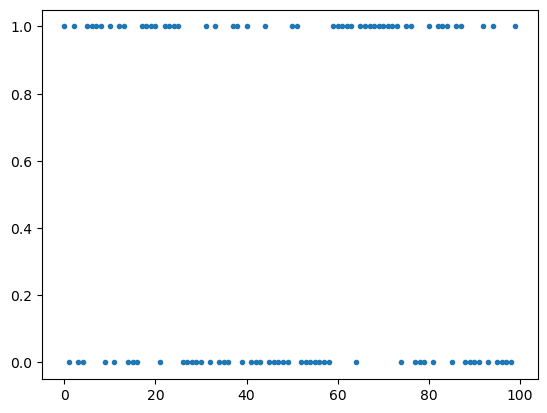

In [13]:
# Potrzebujemy modułu do rysowania
import matplotlib.pyplot as plt

plt.plot(probka, ".")
plt.show()

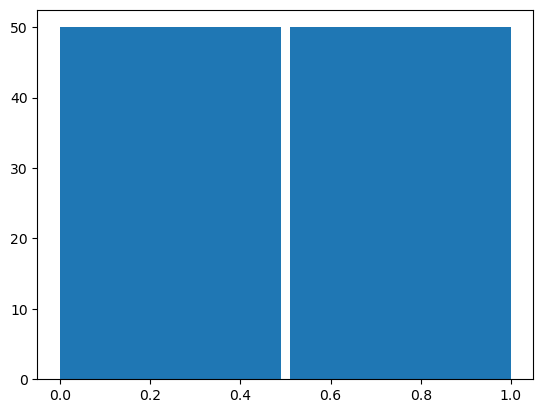

In [14]:
plt.hist(probka, bins=[0,0.49,0.51,1])
plt.show()

Przydatna charakterystyka danych w Pythonie. Jaki jest rozmiar danych (`size`) w poszczególnych wymiarach (`shape`)?

In [16]:
# kształt danych,
print("Kształt = ", probka.shape)

# rozmiar danych
print("Rozmiar = ", probka.size)

# ile zajmuje to w bajtach?
print("Bajtów: ", probka.nbytes)
print("Bajtów: ", probka.size * probka.itemsize)

Kształt =  (100,)
Rozmiar =  100
Bajtów:  800
Bajtów:  800


## 1.2 Charakterystyka losowych wielkości

Strategia postępowania z ekperymentami (na przykład takimi na komputerach), w których pojawią się liczby losowe jest następująca. Powtarzamy dany eksperyment wiele razy, a z otrzymanych danych staramy się uzyskać jakieś wielkości, które mają sens i pozwolą nam scharakteryzować te dane.

Wprowadźmy teraz ważne wielkości, które ułatwiają analizę danych.

**Średnia**:
$$\langle x \rangle = \frac{1}{N}\sum_i x_i$$

**Kwadrat średniej**:
$$\langle x^2 \rangle = \frac{1}{N}\sum_i x_i^2$$

**Wariancja**:
$$\mathrm{Var}(x) = \left\langle \big(x-\langle x \rangle\big)^2 \right\rangle = \langle x^2\rangle - \langle x \rangle^2$$

**Odchylenie standardowe**:
$$\sigma_x = \left\langle \big(x-\langle x \rangle\big)^2 \right\rangle\!{}^{1/2}  =  \sqrt{\mathrm{Var}(x)}$$

Zobaczmy jak to działa na przykładzie liczb 0 i 1.

In [17]:
# losujemy próbkę
rozmiar_probki = 1000
probka = generator.integers(low=0, high=2, size=rozmiar_probki)

probka[1:40]

array([0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0])

In [18]:
# policzmy średnią i wariancję
srednia = np.mean(probka)
wariancja = np.std(probka)**2
var = np.var(probka)

srednia, wariancja, var

(0.476, 0.2494240000000001, 0.24942400000000006)

In [19]:
# policzmy z definicji wariancję <x^2> - <x>^2 = < ( x - <x> )**2 >
np.sum(((probka - np.mean(probka))**2))/probka.size, 0.5**2 # teoretyczna wartość to 0.25

(0.24942400000000006, 0.25)

In [20]:
odch_std = np.std(probka)
print(f"Odchylenie standardowe {odch_std}")

# odchylenie standardowe mowi o rozrzucie danych wokol wartości średniej
print(f"Przedział: [{srednia - odch_std}, {srednia + odch_std}]")

Odchylenie standardowe 0.49942366784124287
Przedział: [-0.02342366784124289, 0.9754236678412429]


## 1.3 Dlaczego prawie wszędzie w naturze są rozkłady Gaussowskie? Centralne twierdzenie graniczne

Zobaczmy co się stanie, jeżeli wylosujemy $N$ liczb losowych 0 lub 1 i je dodamy.
$$X = x_1 + x_2 + \ldots + x_N  = \sum_{i=1}^N x_i $$

In [27]:
# ustalmy ile chcemy liczb losowych
N = 20

# generujemy ciąg N liczb losowych 0 lub 1
seq = generator.integers(low=0,high=2, size=N)
print("Wylosowaliśmy: ", seq)
print("suma = ", np.sum(seq))

Wylosowaliśmy:  [1 0 1 0 0 0 1 0 1 1 1 1 1 1 1 1 1 0 1 1]
suma =  14


Powtórzmy to wiele, wiele razy...  
Tutaj $10^5$ razy.

In [28]:
N_powtorzen = 10**5

# tworzymy pusty kontener na dane
dane = np.empty(shape=N_powtorzen)

# powtarzamy losowanie przy pomocy instrukcji for
for i in range(1, N_powtorzen):
    # generujemy N liczb (domyślnie 20)
    seq = generator.integers(low=0,high=2, size=N)
    #  sumujemy wszystkie wygenerowane liczby i zapisujemy je w kontenerze na i-tym miejscu
    dane[i] = np.sum(seq)

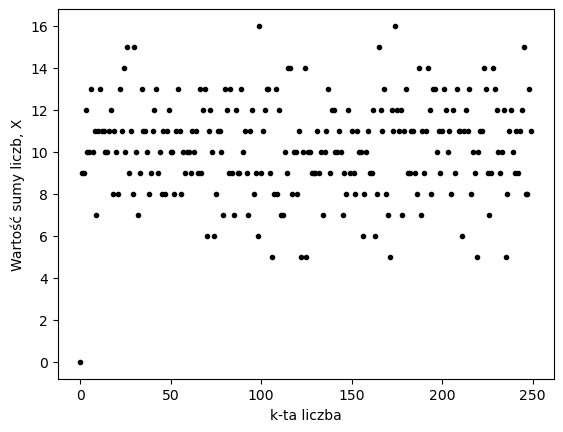

In [29]:
# zobaczmy jak wygląda pierwsze 250 danych
plt.plot(dane[:250], ".k") # ".k" oznacza "narysuj kropki (.) w kolorze czarnym (k)"
plt.xlabel("k-ta liczba")
plt.ylabel("Wartość sumy liczb, X")
plt.show()

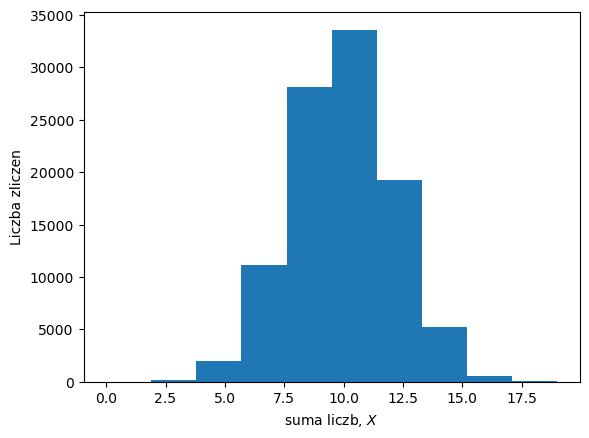

In [30]:
# zliczmy ile razy pojawiła się dana liczba X
plt.hist(dane, bins=10, density=False)
plt.xlabel(r"suma liczb, $X$")
plt.ylabel(r"Liczba zliczen")
plt.show()

In [31]:
# Jaki to kształ?
# Zdefiniujmy rozkład gaussowski

def f(x, mean, sigma):
  return np.exp(-(x-mean)**2 / (2 * sigma**2)) / np.sqrt(2 * np.pi * sigma**2)

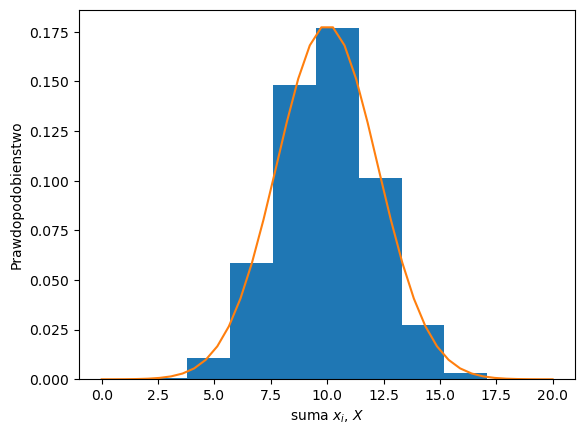

In [32]:
# próbkujemy funkcję f(x), tj. tworzymy ciąg par liczb (x1, f(x1)), (x2, f(x2)), ...
# a potem go narysujemy na wykresie

xs = np.linspace(0,20,40) # to tworzy dane (x1, x2, x3, ..., xN), gdzie x1=0, xN=20, N=40
fs = f(xs, 0.5* N, 0.5*np.sqrt(N))


plt.hist(dane, bins=10, density=True)
plt.plot(xs, fs)
plt.xlabel(r"suma $x_i$, $X$")
plt.ylabel(r"Prawdopodobienstwo")
plt.show()

## 1.4 Korelacje - najprostszy opis zmiennych losowych

Zróbmy teraz eksperyment. Jak z losowości wydobyć prawidłowości?

Wylosujmy najpierw kilka ciągów $N$ liczb.

Ustalmy na przykład 10.

Losujemy więc

$$X_1,\ X_2,\ X_3,\ \ldots,\ X_8,\ X_9,\ X_{10}$$
Każda liczba $X_i$ może mieć wartość 0 lub 1.

Pytania:
* Czy jest jakaś zależność pomiędzy liczbą $X_1$ oraz liczbą $X_2$ albo $X_k$?
* Jak to sprawdzić?

In [33]:
# Ustalmy N liczb, i powtórzmy losowanie N_powtorzen razy.
N = 10
N_powtorzen = 1000

# Losujemy!
dane = generator.integers(low=0, high=2, size=(N_powtorzen, N))
print("Kształt danych: dane.shape = ", dane.shape )

print("Kilka przykładów:")
for i in range(0,10):
  print(i, ": ", dane[i])
print(": :   ...")

Kształt danych: dane.shape =  (1000, 10)
Kilka przykładów:
0 :  [0 1 1 0 1 0 1 0 1 1]
1 :  [0 1 0 1 1 0 0 1 1 1]
2 :  [0 0 1 1 1 1 1 0 1 1]
3 :  [0 0 0 1 1 0 1 0 1 1]
4 :  [1 1 1 1 0 0 0 1 0 1]
5 :  [1 1 1 1 0 1 1 0 1 1]
6 :  [1 1 1 0 0 0 1 1 1 0]
7 :  [0 0 1 0 1 0 1 0 1 1]
8 :  [0 0 1 0 1 0 1 0 1 0]
9 :  [0 1 0 0 1 1 0 1 0 0]
: :   ...


Policzymy średnią wartość oraz odchylenie standardowe

In [34]:
# policzmy średnią w zero-wym i n-tym punkcie
def srednie(data, n):
  mean_0 = np.mean(data[::, 0]) # punkt zerowy
  mean_n = np.mean(data[::, n]) # punkt n-ty
  return mean_0, mean_n

In [35]:
srednie(dane, 3)

(0.502, 0.515)

**Korelacja**

Liczymy teraz **korelację**:
$$ g_n = \big\langle \big( X_0 - \langle X_0\rangle \big) \big( X_n - \langle X_n\rangle \big) \big\rangle$$

Uwagi:
* Jeśli zmienne $X_0$ i $X_n$ są niezależne, to korelacja jest zero, $g_n=0$.
* Jeśli jest jakaś między nimi zależność, to korelacja jest niezerowa.

In [36]:
# policzmy korelację pomiędzy n-tym punktem a zero-wym
# to jest funkcja g_n z wzoru powyżej

def corr(data, n):
  mean_0 = np.mean(data[::, 0]) # punkt zerowy
  mean_n = np.mean(data[::, n]) # punkt n-ty
  wynik = np.mean((data[::,0] - mean_0)*(data[::,n] - mean_n))
  return wynik

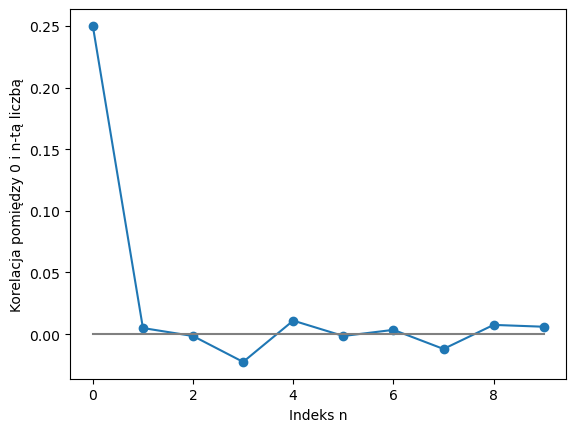

In [37]:
# zobaczmy jak wygląda korelacja w funkcji n
# tworzymy tablicę zmieniając n = 0,1,2,3... we wzorze na g_n = corr(data,n)

corrs = [ corr(dane, n) for n in range(0,N)]


# rysujemy wynik:
import matplotlib.pyplot as plt
plt.plot(corrs, "o-"),
plt.plot(range(0,N), [0]*N,"-", color="gray")
plt.xlabel("Indeks n")
plt.ylabel("Korelacja pomiędzy 0 i n-tą liczbą")
plt.show()

Co jeśli podmienimy np. 6-tą liczbę?

Zróbmy taki żart. Powiedzmy, że bierzemy tę 6-tą liczbę. Zamiast niej podstawiamy w danym ciągu wartość 1-szej liczby.


In [38]:
# kopujemy dane, żeby mieć porównanie
daneJoke = dane.copy()

# podstawiamy X_1 -> X_6:
# pamiętamy, że 6-ta liczba ma indeks 5, bo zaczynamy indeksowanie od zera

for i in range(len(daneJoke)):
  liczby = daneJoke[i]
  liczby[5] = liczby[0]

In [39]:
# czy widzimy różnicę?

idx = generator.integers(len(dane))
print(f"Zobaczmy indeks: {idx}")
print(dane[idx])
print(daneJoke[idx])

Zobaczmy indeks: 805
[0 0 1 1 1 0 0 0 1 0]
[0 0 1 1 1 0 0 0 1 0]


In [40]:
print("Jak wyglądają dane?")
for i in range(0,10):
  print(i, ": ", daneJoke[i])
print(": :   ...")

print("Czy widać tu jakaś nielosowość?")

Jak wyglądają dane?
0 :  [0 1 1 0 1 0 1 0 1 1]
1 :  [0 1 0 1 1 0 0 1 1 1]
2 :  [0 0 1 1 1 0 1 0 1 1]
3 :  [0 0 0 1 1 0 1 0 1 1]
4 :  [1 1 1 1 0 1 0 1 0 1]
5 :  [1 1 1 1 0 1 1 0 1 1]
6 :  [1 1 1 0 0 1 1 1 1 0]
7 :  [0 0 1 0 1 0 1 0 1 1]
8 :  [0 0 1 0 1 0 1 0 1 0]
9 :  [0 1 0 0 1 0 0 1 0 0]
: :   ...
Czy widać tu jakaś nielosowość?


Policzmy jednak korelację!

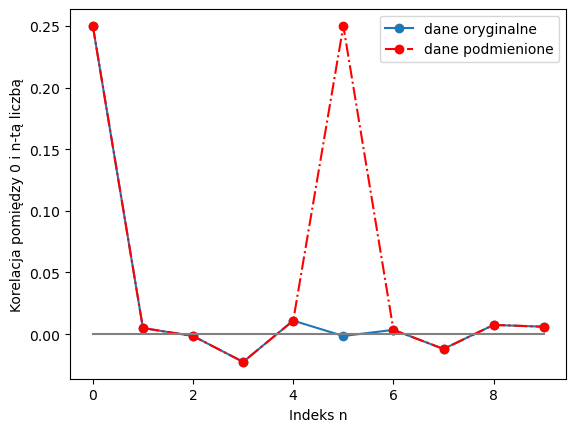

In [41]:
# chcemy teraz narysować korelacje: g_0, g_1, g_2, ...

corrs = [ corr(dane, n) for n in range(0,N)]
corrsJoke = [ corr(daneJoke, n) for n in range(0,N)]

import matplotlib.pyplot as plt
plt.plot(corrs, "o-", label="dane oryginalne"),
plt.plot(corrsJoke, "o-.r", label="dane podmienione"),
plt.plot(range(0,N), [0]*N,"-", color="gray")
plt.xlabel("Indeks n")
plt.ylabel("Korelacja pomiędzy 0 i n-tą liczbą")
plt.legend()
plt.show()

# 2. Ćwiczenia z liczbami losowymi

## 2.1 Ćwiczenie #1 - losowy żart

Napisz program, który losuje liczbę losową 0 lub 1. Jeśli wylosował 0, nie podmieniaj liczby w scenariuszu opisanym powyżej. Jeśli program wylosował 1, podmień liczbę.  

Jak wygląda teraz korelacja?

Użyj komendy `if/elif/else`.  
Działa ona w następujący sposób:
```python
if warunek1:
    # zrób coś jeśli warunek1 jest prawdziwy
elif warunek2:
    # zrób coś, jeśli warunek2 jest prawdziwy
else:
    # zróļ coś, jeśli wszystkie warunki są fałszywe
```

In [45]:
# Tu wpisz kod
# ...
# ...
# ...

### Ćwiczenie #1: rozwiązanie

Jak wyglądają dane?
0 :  [0 1 1 0 1 0 1 0 1 1]
1 :  [0 1 0 1 1 0 0 1 1 1]
2 :  [0 0 1 1 1 0 1 0 1 1]
3 :  [0 0 0 1 1 0 1 0 1 1]
4 :  [1 1 1 1 0 1 0 1 0 1]
5 :  [1 1 1 1 0 1 1 0 1 1]
6 :  [1 1 1 0 0 0 1 1 1 0]
7 :  [0 0 1 0 1 0 1 0 1 1]
8 :  [0 0 1 0 1 0 1 0 1 0]
9 :  [0 1 0 0 1 1 0 1 0 0]
: :   ...
Teraz jeszcze trudniej zobaczyć jakąś prawidłowość, prawda?
A jednak, 'korelacja' to 'widzi'.


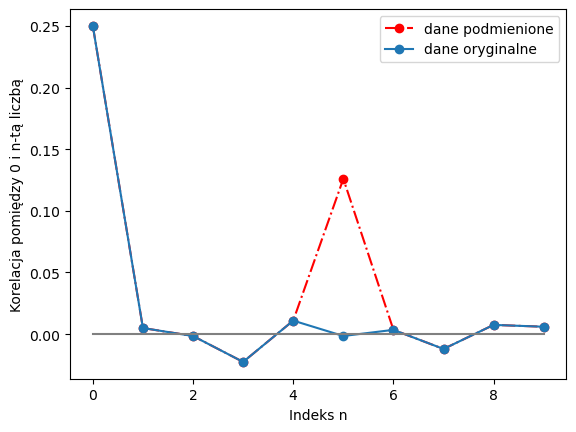

In [49]:
daneJoke2 = dane.copy()

for i in range(len(daneJoke2)):
  liczby = daneJoke2[i]

  # losujemy liczbę 0 lub 1, w zależności od wartości podejmiemy decyzję o podmianie
  r = generator.integers(0,2)
  if r == 0:
    liczby[5] = liczby[0]
  # jeśli r != 0 nie robimy nic, więc nie potrzebujemy reszty instrukcji

print("Jak wyglądają dane?")

for i in range(0,10):
  print(i, ": ", daneJoke2[i])
print(": :   ...")
print("Teraz jeszcze trudniej zobaczyć jakąś prawidłowość, prawda?")
print("A jednak, 'korelacja' to 'widzi'.")

corrs_Joke2 = [ corr(daneJoke2, n) for n in range(0,N)]

plt.plot(corrs_Joke2, "o-.r", label="dane podmienione")
plt.plot(corrs, "o-", label="dane oryginalne")
plt.plot(range(0,N), [0]*N,"-", color="gray")
plt.xlabel("Indeks n")
plt.ylabel("Korelacja pomiędzy 0 i n-tą liczbą")
plt.legend()
plt.show()

## 2.2 Ćwiczenie #2 - Wracając z imprezy...

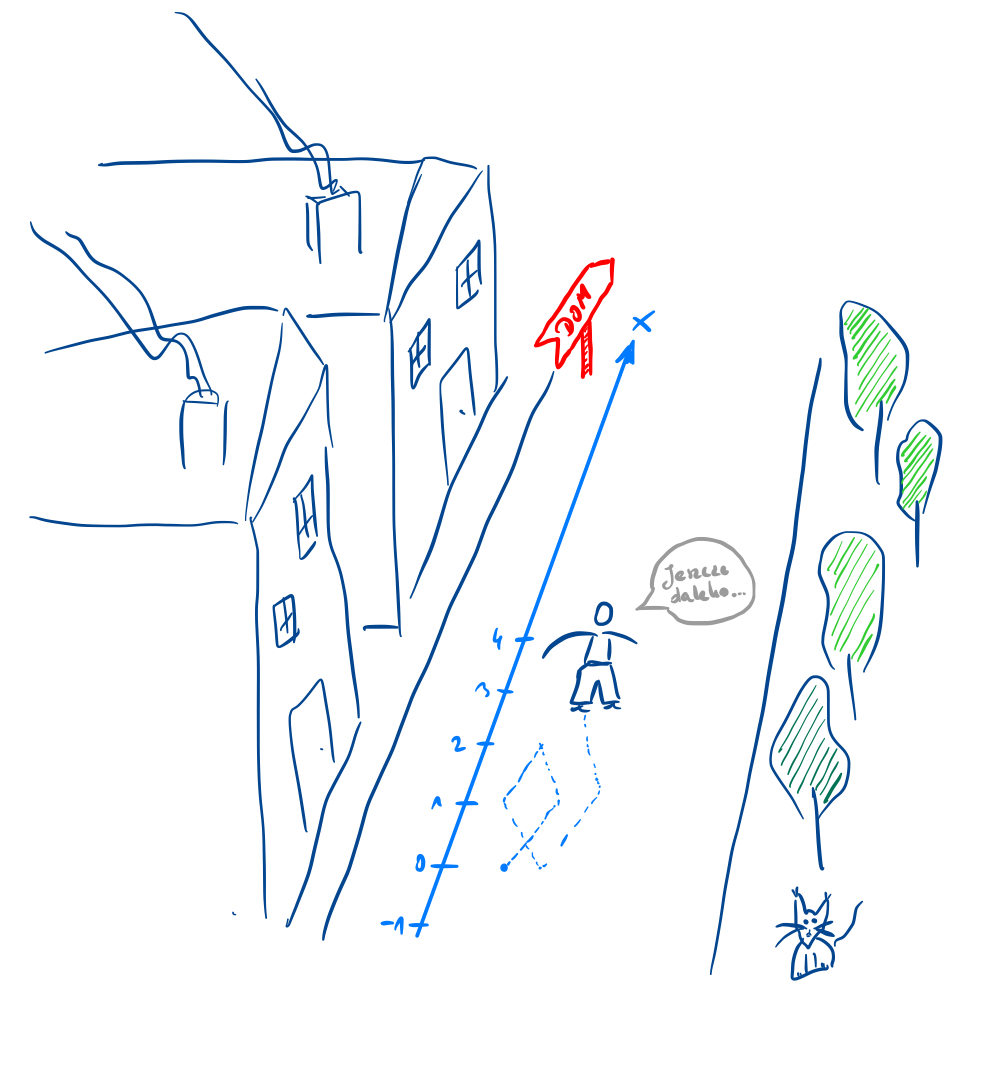

Wyobraźmy sobie studenta lub studentkę, który tak bardzo się cieszył, że zdał trudny egzamin podczas sesji, że postanowił uczcić swoje osiągnięcie. Wraca teraz do domu idąc ulicą, ale kroki z trudem stawia i nie bardzo wie, w którą stronę iść, ponieważ jest tak zmęczony. Czasem stawia więc krok do przodu, a czasem krok do tyłu...

Pytanie, jak daleko dojdzie?....

Spróbujmy to oszacować, gdzie znajdzie się po $n$ krokach.

Oznaczmy:
* $d$ - długość kroku
* $X_k = \pm d$ - $k$-ty krok, jeśli dodatni, to idzie do przodu, jeśli ujemny to do tyłu
* $s_n = X_0 + X_1 + \ldots + X_n$ - całkowity dystans po $n$ krokach

$X_k$ jest zmienną losową, ponieważ nie wiemy, w którą stronę osoba postawi krok.

In [50]:
# długość kroku
d = 1.0 # np w metrach

# wylosujmy n kroków
n_krokow = 100

# zobaczmy poniżej, że losujmey 0 lub 1, chcemy jednak, żeby wartości losowe wynosiły -1 lub 1. Możemy to łatwo uzyskać stosując transformację: {0,1} = x -> y = 2 x - 1 = {-1, 1}
kroki = generator.integers(low=0, high=2, size=n_krokow)
kroki = 2*kroki -1
kroki = d*kroki  # nadajemy skalę: jeden krok odowiada dystansowi d

kroki

array([ 1.,  1.,  1.,  1.,  1., -1., -1.,  1., -1., -1.,  1., -1.,  1.,
        1.,  1.,  1.,  1.,  1., -1., -1., -1., -1., -1.,  1.,  1., -1.,
        1.,  1.,  1., -1., -1.,  1.,  1., -1.,  1., -1., -1.,  1., -1.,
       -1.,  1.,  1.,  1., -1.,  1., -1., -1., -1.,  1.,  1., -1.,  1.,
       -1., -1., -1.,  1.,  1., -1., -1.,  1., -1., -1.,  1., -1.,  1.,
        1., -1.,  1.,  1.,  1., -1., -1., -1., -1.,  1.,  1., -1.,  1.,
        1., -1., -1.,  1.,  1., -1.,  1., -1., -1.,  1., -1.,  1., -1.,
        1.,  1., -1.,  1., -1.,  1.,  1., -1., -1.])

In [51]:
# Jak daleko dojdzie po n krokach?
dystans_n = np.sum(kroki)

print(f"Osoba zrobiła {n_krokow} kroków, a pokonała dystans {dystans_n} metrów.\nCzy to dużo?")

Osoba zrobiła 100 kroków, a pokonała dystans 4.0 metrów.
Czy to dużo?


Zbadajmy to zagadnienie dokładniej. Stwórzmy najpierw funkcję, która generuje dystans po $n$ krokach.

In [52]:
# generujemy dostans przebyty aż do n kroków

def trajektoria(n, d):
  kroki = generator.integers(low=0, high=2, size=n)
  kroki = 2*kroki -1
  kroki = d*kroki

  return np.concatenate((np.array([0.,]), np.cumsum(kroki)))


In [53]:
trajektoria(10, d)

array([ 0., -1., -2., -1.,  0.,  1.,  0., -1.,  0., -1., -2.])

Zrozumiemy zagadnienie, a więc na czym polega zjawisko, jeżeli przyjrzymy się wielu takim osobom. Każdy jest inny, ale tylko powtarzając jakieś zjawisko, możemy zrozumieć leżace u podstaw mechanizmy.

In [54]:
# załóżmy, że każdą osobę obserwujemy przez n_kroków (tu np. 30)
# załóżmy, że obserwujemy konkretną liczbę osób (np. tutaj ile_osob=10)

n_krokow = 30
ile_osob = 10
trajektorie_wiele_osob = [trajektoria(n_krokow, d) for n in range(ile_osob)]

In [57]:
print(f"0: {trajektorie_wiele_osob[0]}")
print(f"1: {trajektorie_wiele_osob[1]}")
print(f"2: {trajektorie_wiele_osob[1]}")

0: [0. 1. 2. 3. 4. 5. 4. 3. 4. 5. 4. 5. 6. 5. 6. 7. 6. 7. 8. 7. 6. 5. 4. 5.
 6. 5. 6. 5. 4. 5. 6.]
1: [ 0.  1.  2.  3.  4.  3.  4.  5.  6.  7.  8.  7.  6.  5.  6.  7.  8.  9.
 10. 11. 10. 11. 10.  9.  8.  9. 10. 11. 12. 11. 10.]
2: [ 0.  1.  2.  3.  4.  3.  4.  5.  6.  7.  8.  7.  6.  5.  6.  7.  8.  9.
 10. 11. 10. 11. 10.  9.  8.  9. 10. 11. 12. 11. 10.]


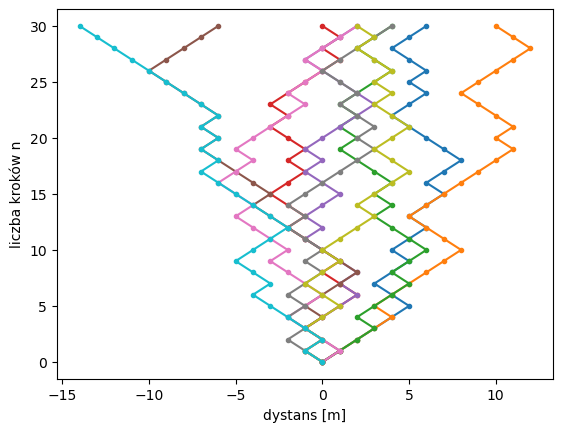

In [58]:
import matplotlib.pyplot as plt

for i in range(ile_osob):
  plt.plot(trajektorie_wiele_osob[i], np.arange(n_krokow+1), ".-")
plt.xlabel("dystans [m]")
plt.ylabel("liczba kroków n")
plt.show()

Widzimy, że te osoby nie dochodzą bardzo daleko...
Przejdźmy teraz do takiej sytuacji, w której mamy wiele tysięcy takich osób.
I zapytajmy, ile osób osiągnęło po n krokach jakiś konkretny dystans.

In [59]:
n_krokow = 100
ile_osob = 2000
trajektorie_wiele_osob = [trajektoria(n_krokow, d) for n in range(ile_osob)]
trajektorie_wiele_osob = np.array(trajektorie_wiele_osob)

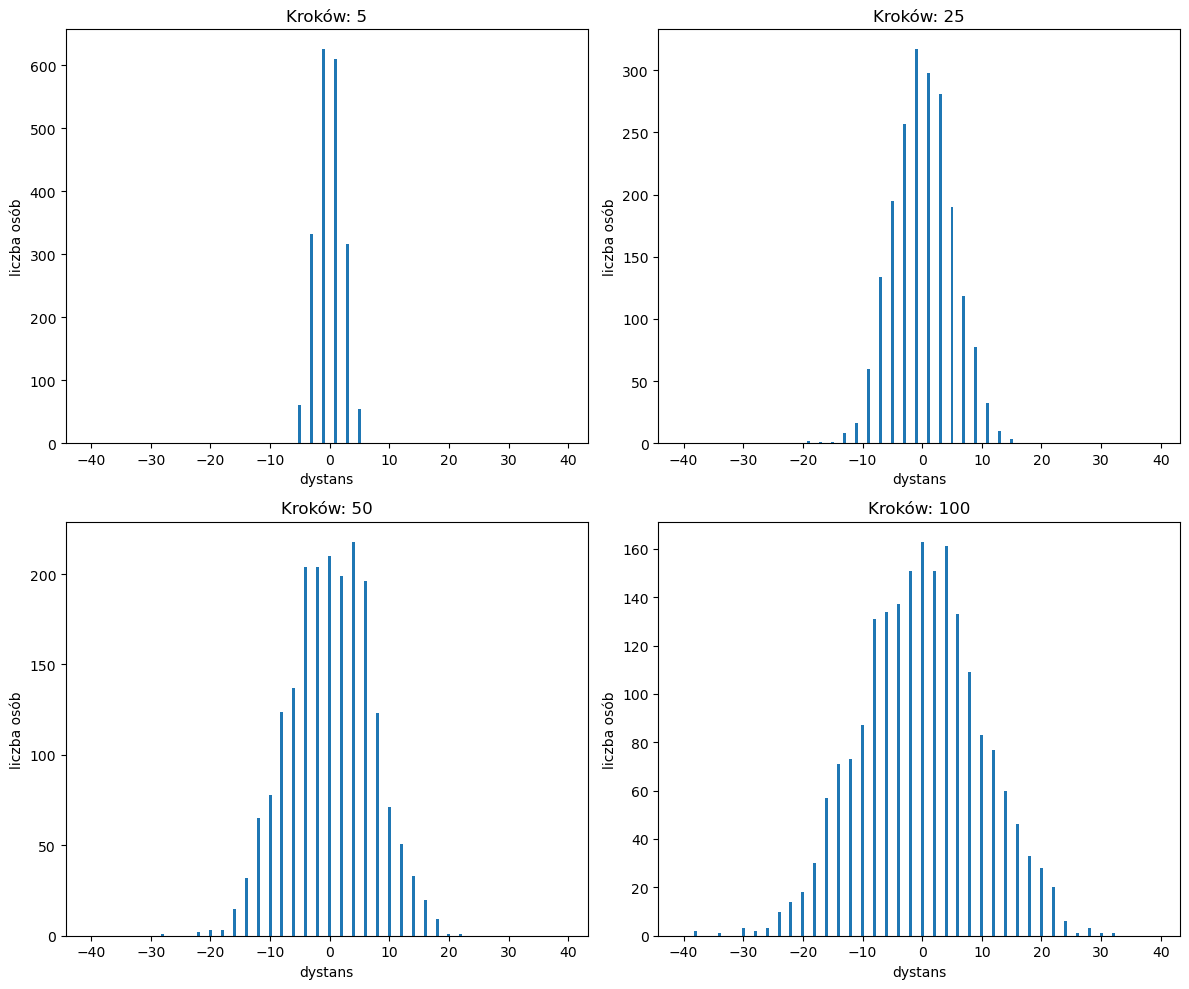

In [60]:
plt.figure(figsize=(12, 10))
plt.subplot(2, 2, 1)
steps = 5
plt.hist(trajektorie_wiele_osob[::, steps], bins=np.arange(-40,40,0.5), align="left")
plt.xlabel("dystans")
plt.ylabel("liczba osób")
plt.title(f'Kroków: {steps}')


plt.subplot(2, 2, 2)
steps = 25
plt.hist(trajektorie_wiele_osob[::, steps], bins=np.arange(-40,40,0.5), align="left")
plt.xlabel("dystans")
plt.ylabel("liczba osób")
plt.title(f'Kroków: {steps}')

plt.subplot(2, 2, 3)
steps = 50
plt.hist(trajektorie_wiele_osob[::, steps], bins=np.arange(-40,40,0.5), align="left")
plt.xlabel("dystans")
plt.ylabel("liczba osób")
plt.title(f'Kroków: {steps}')

plt.subplot(2, 2, 4)
steps = 100
plt.hist(trajektorie_wiele_osob[::, steps], bins=np.arange(-40,40,0.5), align="left")
plt.xlabel("dystans")
plt.ylabel("liczba osób")
plt.title(f'Kroków: {steps}')

plt.tight_layout()
plt.show()


## 2.3 Ćwiczenie #3 - proces "błądzenie losowe" ("random walk")

Załóżmy, że osoba jednak ma jednak większą szansę na krok do przodu niż na krok w tył. Jak wygląda wtedy rozkład prawdopodobieństwa?

In [ ]:
# tu wpisz swój kod...
# użyj funkcji np.random.choice

# ...
# ...
# ...

### Ćwiczenie #3 - rozwiązanie

In [61]:
# generujemy dostans przebyty aż do n kroków

def trajektoria_p(n, d, p):
  kroki = np.random.choice([-1,1], p =[1-p, p], size=n)
  kroki = d*kroki

  return np.concatenate((np.array([0.,]), np.cumsum(kroki)))


In [62]:
n_krokow = 100
ile_osob = 2000

# prawdopodobieństwo ruszenia do przodu
p_val = 0.9

trajektorie_wiele_osob = [trajektoria_p(n_krokow, d, p_val) for n in range(ile_osob)]
trajektorie_wiele_osob = np.array(trajektorie_wiele_osob)

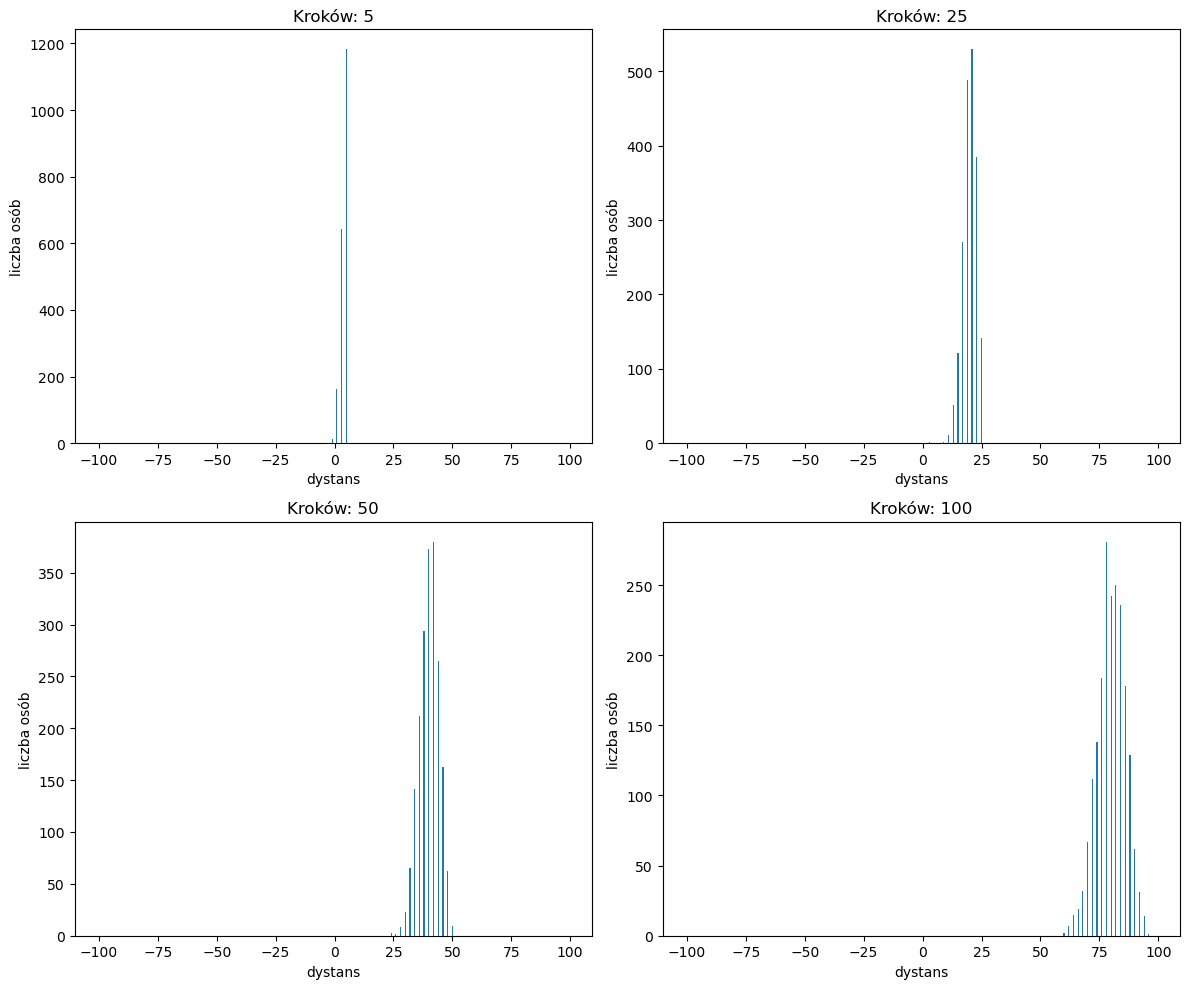

In [63]:
plt.figure(figsize=(12, 10))
plt.subplot(2, 2, 1)
steps = 5
plt.hist(trajektorie_wiele_osob[::, steps], bins=np.arange(-100,100,0.5), align="left")
plt.xlabel("dystans")
plt.ylabel("liczba osób")
plt.title(f'Kroków: {steps}')


plt.subplot(2, 2, 2)
steps = 25
plt.hist(trajektorie_wiele_osob[::, steps], bins=np.arange(-100,100,0.5), align="left")
plt.xlabel("dystans")
plt.ylabel("liczba osób")
plt.title(f'Kroków: {steps}')

plt.subplot(2, 2, 3)
steps = 50
plt.hist(trajektorie_wiele_osob[::, steps], bins=np.arange(-100,100,0.5), align="left")
plt.xlabel("dystans")
plt.ylabel("liczba osób")
plt.title(f'Kroków: {steps}')

plt.subplot(2, 2, 4)
steps = 100
plt.hist(trajektorie_wiele_osob[::, steps], bins=np.arange(-100,100,0.5), align="left")
plt.xlabel("dystans")
plt.ylabel("liczba osób")
plt.title(f'Kroków: {steps}')

plt.tight_layout()
plt.show()


In [64]:
# zastaówmy się jeszcze jaka jest szerokość rozkładu po n krokach
# szerokość, czyli odchylenie od średniej, czyli np.std

def szerokosc(n, trajektorie):
  dane = trajektorie_wiele_osob[::,n]
  return np.std(dane)


def srednia(n, trajektorie):
  dane = trajektorie_wiele_osob[::,n]
  return np.mean(dane)

In [65]:
szerokosci = [szerokosc(n, trajektorie_wiele_osob) for n in range(n_krokow)]
srednie = [srednia(n, trajektorie_wiele_osob) for n in range(n_krokow)]

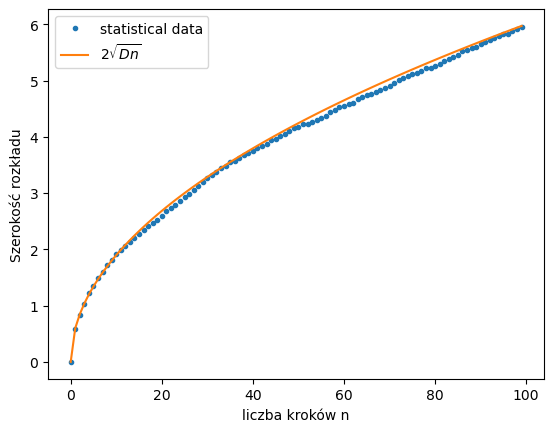

In [66]:
ns = np.arange(n_krokow)

# diffusion coefficient
Dval = (p_val)*(1-p_val)

plt.plot(ns, szerokosci, ".", label="statistical data")
plt.plot(ns, 2.0*np.sqrt(Dval * ns), label=r"$2 \sqrt{D n}$")
plt.xlabel("liczba kroków n")
plt.ylabel("Szerokość rozkładu")
plt.legend(loc='upper left')
plt.xscale("linear")
plt.yscale("linear")
plt.show()

Średnia prędkość wynosi v = 0.8 d/krok


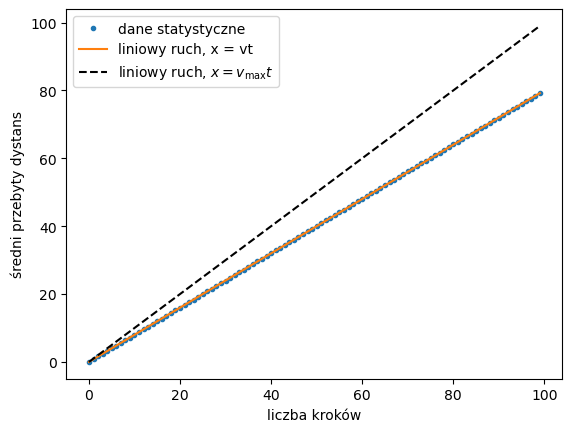

In [67]:
ns = np.arange(n_krokow)

# średnia prędkość, zauważ że v<1
v = (2*p_val-1)
print(f"Średnia prędkość wynosi v = {v} d/krok")

plt.plot(ns, srednie, ".", label="dane statystyczne")
plt.plot(ns, (2*p_val-1) * ns , label="liniowy ruch, x = vt")
plt.plot(ns, ns , label=r"liniowy ruch, $x = v_\mathrm{max}t$", linestyle="dashed", c="k")

plt.xlabel("liczba kroków")
plt.ylabel("średni przebyty dystans")
plt.xscale("linear")
plt.yscale("linear")
plt.legend()
plt.show()

# 3. Generowanie liczb losowych z rozkładów

## 3.1 Płaski rozkład

Nauczmy się najpierw generować liczby losowe z przedziału [0,1]. Jest to bardzo użyteczne.

In [68]:
import numpy as np

seed=12345
generator = np.random.default_rng(seed)

In [69]:
# losujemy [0,1)

Nm = 1000
rs = generator.uniform(0,1, size=Nm)

[0.22733602 0.31675834 0.79736546 0.67625467 0.39110955 0.33281393
 0.59830875 0.18673419 0.67275604 0.94180287 0.24824571 0.94888115
 0.66723745 0.09589794 0.44183967 0.88647992 0.6974535  0.32647286
 0.73392816 0.22013496]


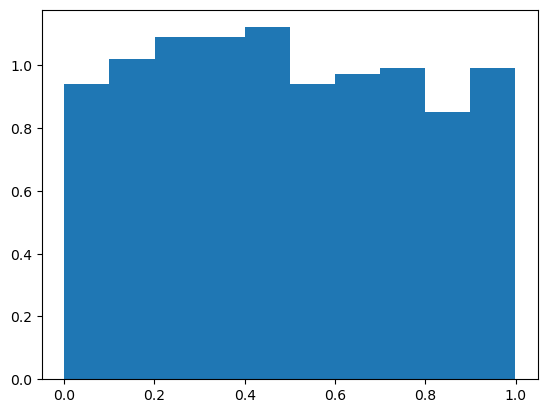

In [70]:
plt.hist(rs, density=True)
print(rs[0:20])

## 3.2 Dowolny rozkład, metoda #1 - metoda inwersji

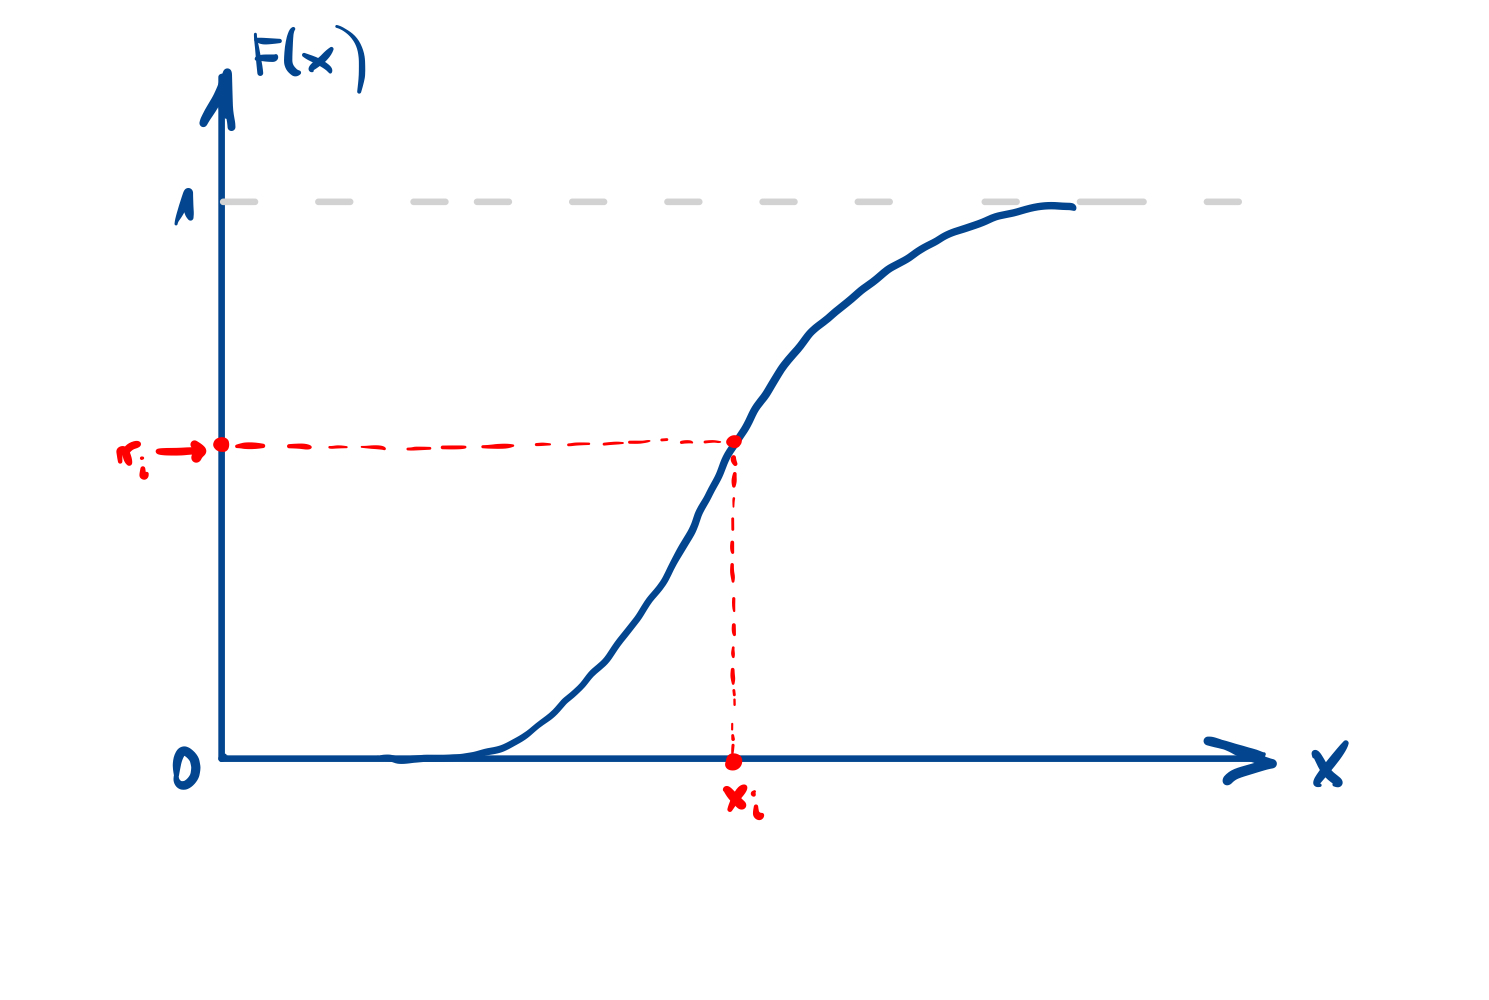

**Metoda**  

Mamy zadany rozkład $p(x)$.   
Taki rozkład spełnia $p(x)\geqslant0$ oraz $\int_{-\infty}^{\infty}p(x)dx = 1.$   
Wyznaczmay funkcję $F(x) = \int_{-\infty}^{x}p(z)dz$.   
Zauważmy, że $0 \leqslant F(x) \leqslant 1$.

Losujemy $r\in [0,1]$.
Znajdujemy $x$ takie, że $F(x) = r$.    
Wtedy $x$ są dane rozkładem $p(x)$.

**Przykład**

Zobaczmy jak to działa. Weźmy $p(x) = 2x $ na przedziale $[0,1]$.


Sprawdźmy, że $\int_{0}^1 2x dx = x^2 \big|^{x=1}_{x=0} = 1$.

Wyznaczamy $F(x) = \int_{0}^x 2s ds = x^2$.

Rozwiązujemy więc $r = F(x)$ i znajdujemy $x = \sqrt{r}$.

Sprawdźmy!

In [71]:
# nasz rozkłąd
def rozklad(x):
  return 2*x

# generujemy losowe x na podstawie losowych r z przedziału [0,1)
def genX(r):
  return np.sqrt(r)

In [74]:
Nm=100000
rs = generator.uniform(0,1,size=Nm)

xs = genX(rs)

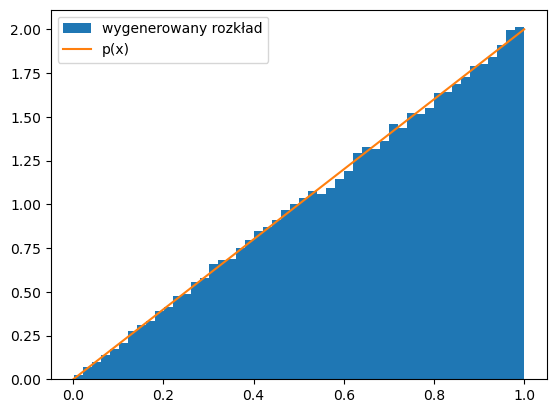

In [77]:
plt.hist(xs, density=True, bins=50,label="wygenerowany rozkład")
plt.plot(np.linspace(0,1,100), rozklad(np.linspace(0,1,100)), label="p(x)")
plt.legend()
plt.show()

## 3.3 Dowolny rozkład, metoda #2 - metoda odrzucania

Metoda bazuje na geometrycznej interpretacji rozkładu prawdopodobieństwa. Zakładamy, że nasz rozkład prawdopodobieństwa $p(x)$ jest ograniczony $x\in[a,b]$ oraz $p(x) \leqslant c$ ma maximum równe $c$.

Procedura:
1. Zamknij $p(x)$ w prostokącie ograniczonym przez $x=a$, $x=b$, $y=0$ oraz $y=c$. Rozmiar prostokąta $(b-a) \times c$.
2. Wylosuj teraz punkt $p = (x,y)$, aby znajdował się w prostokącie. Wylosuj takich punktów bardzo dużo, aby jednorodnie pokryły prostokąt.
Jeśli prostokąt jest duży, potrzebujemy baaaardzo dużo punktów.
3. Jeśli dany punkt $(x,y)$ jest taki, że $y\leqslant p(x)$, tzn. leży pod krzywą (punkty czerwone), to $x$ zaakceptuj. W przeciwnym razie odrzuć.

Zaakceptowane punkty $x$ (czerwone) mają rozkład $p(x)$.

Zobaczmy jak to działa.

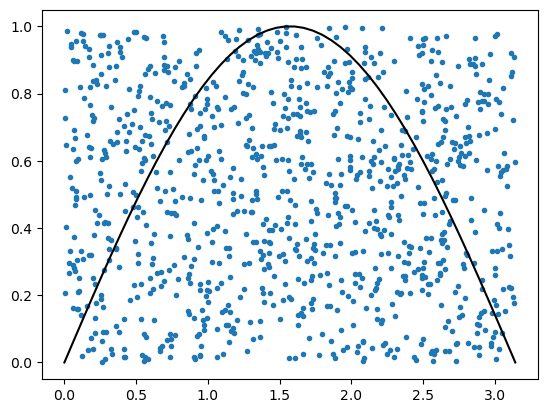

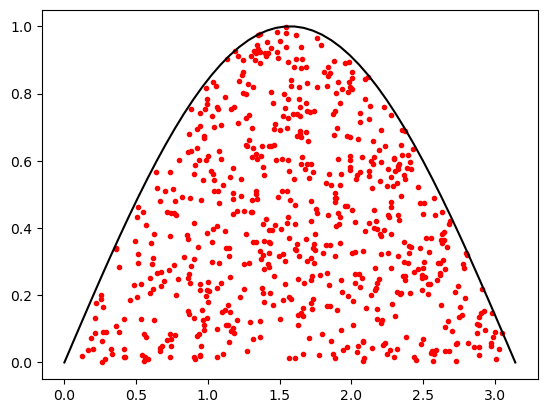

In [81]:
# chcemy wygenerować x dane rozkładem p(x) = sin(x) dla 0<x<pi

x_tab = np.linspace(0,np.pi, 50)
y_tab = np.sin(x_tab)


# losujemy liczby
Nm=10**3
xs = generator.uniform(0, np.pi, size=Nm)
ys = generator.uniform(0, 1, size=Nm)

# mamy pary (x,y)
# dla każdego y wybieramy x tylko wtedy, gdy y <= sin(x)
# wbrany zbiór x nazywamy Xs
sins = np.sin(xs)
Xs = xs[ys<=sins]


plt.plot(xs,ys,".")
plt.plot(x_tab, y_tab, "-k")
plt.show()

plt.plot(Xs,ys[ys<=sins],".r")
plt.plot(x_tab, y_tab, "-k")
plt.show()

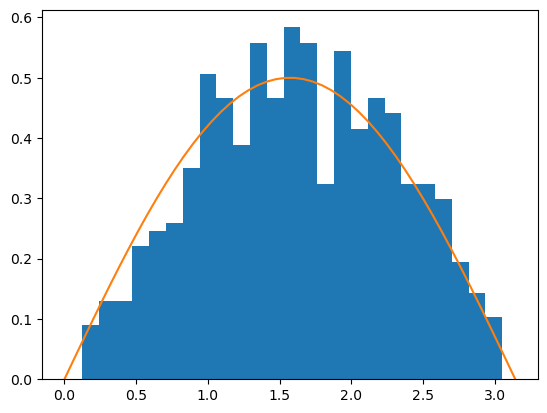

In [83]:
plt.hist(Xs,bins = 25, density=True)
plt.plot( np.linspace(0,np.pi), 0.5*np.sin(np.linspace(0,np.pi)), label="0.5*sin(x)")
plt.show()

# 4. Ćwiczenia z liczbami losowymi

## 4.1 Ćwiczenie #1 - rozkład wykładniczy

Często czas $t \geqslant 0 $ pomiędzy jakimiś wydarzeniami jest opisany rozkładem wykładniczym. Jak go wylosować?

Rozkład prawdopodobieństwa jest opisany przez $p(t) = \lambda e^{- \lambda t}$, gdzie $\lambda$ jest skalą zaniku (wymiar 1/czas).

Użyj metody inwersji.

## 4.2 Ćwiczenie #2 - rozkład dyskretny $\{0,1\}$ z prawdopodobieństwem $\{p, 1-p\}$

Wykorzystując metodę inwersji wygeneruj liczby 0 z pradopodobieństwem $p$
oraz liczby 1 z prawdopodbieństwem $1-p$.

In [ ]:
# wpisz tu swój kod
# ...
# ...
# ...

### Ćwiczenie #2 - rozwiązanie

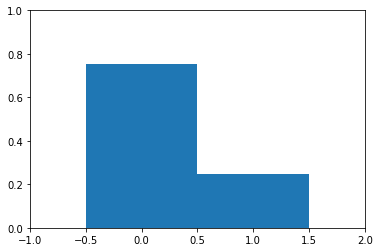

In [ ]:
pval = 0.75

def cdf(r, pval):
  if r <= pval:
    return 0
  elif r > pval:
    return 1

# generujemy zbiór { r } and { cdf(r) }
rs = generator.uniform(0,1,size=10000)
ys = np.array(list(map( lambda x: cdf(x, pval), rs)))

# histogram
plt.hist(ys, density=True, bins=[0,1,2], align="left")
plt.xlim(-1,2)
plt.ylim(0,1)
plt.show()

## 4.3 Ćwiczenie #3 - rozkład na sferze

Mając do dyspozycji liczby losowe, możemy użyć ich do wygenerowania punktów na sferze.

Punkt na sferze możemy sparametryzować poprzez punkt na sferze:
$$\mathbf{r} = (\sin\theta \cos\phi, \sin\theta \sin\phi, \cos\theta)$$.

Zobaczmy, że dla dowolnych kątów $(\theta,\phi)$ wektor $\mathbf{r}$ jest unormowany $\mathbf{r}^2 = 1$.

Aby pokryć całą sferę, wylosujemy liczby losowe $\theta \in [0,\pi)$ oraz $\phi \in [0,2\pi)$.

Zobaczmy jak to wygląda.

### Ćwiczenie #3 - rozwiązanie

In [84]:
# losujemy kąty theta

import numpy as np

seed=12345
generator = np.random.default_rng(seed)

# ile punktów w każdym wymiarze?
Ntheta, Nphi = 2000,2000
thetas = generator.uniform(0, np.pi, size=Ntheta)
phis = generator.uniform(0,2*np.pi, size=Nphi)

Jak punkty leżą na płaszczyźnie $(\theta,\phi)$?

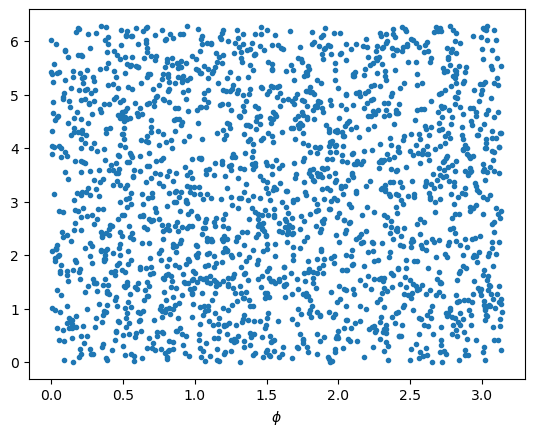

In [85]:
plt.plot(thetas,phis, ".")
plt.xlabel(r"$\theta$")
plt.xlabel(r"$\phi$")
plt.show()

Wyglądają na dość jednorodnie rozłożone w płaszczyźnie.

Ale jak wyglądają na sferze?

Sprawdźmy!

In [86]:
def position(angle):
  theta,phi = angle
  out = np.array([np.sin(theta) * np.cos(phi),
    np.sin(theta) * np.sin(phi),
    np.cos(theta)])
  return out

In [87]:
# generujemy pozycje na sferze (x,y,z)
points = zip(thetas,phis)
ps = map(position, points)
ps = np.array(list(ps))

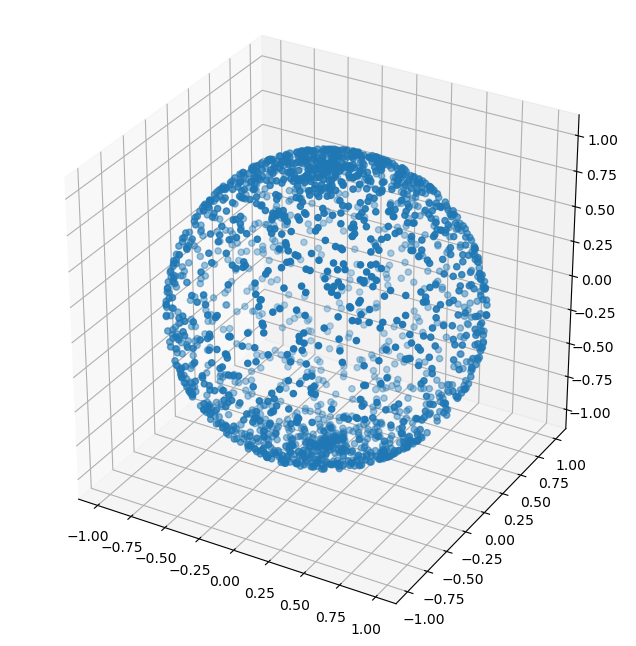

In [88]:
# narysujmy 3d
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(projection='3d')
ax.set_box_aspect((1,1,1))  # ustaw rozmiary pudełka 1:1:1

ax.scatter(ps[:,0], ps[:,1], ps[:,2],".")
plt.show()

Widoczne jest zgrupowanie punktów wokół biegunów...
Jak to usunąć?

Okazuje się, że ważne jest generowanie kąta $\theta$ danego rozkładem $\sin\theta$.

Dlaczego?

Otóż całka po sferze, która ma wyrażać średnią z jakiejś funkcji, tzn.
$$\langle f(\mathbf{r})\rangle = \iint_{\mathrm{sfera}}d^2r f(\mathbf{r})$$
w zmiennych biegunowych $(\theta,\phi)$ przyjmuje postać
$$\langle f(\mathbf{r})\rangle = \int_{0}^\pi d\theta \int_{0}^{2\pi}\!\! d\phi\,  \sin\theta f(\mathbf{\theta,\phi})$$.
Otrzymujemy więc dodatkowy $\sin\theta$, którego nie uwzględniliśmy.

Zobaczmy co się stanie, jak go uwzględnimy.

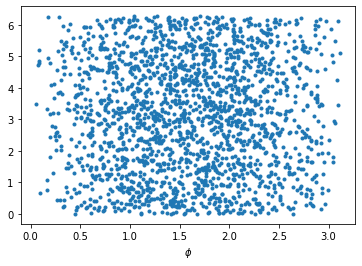

In [ ]:
Ntheta, Nphi = 2000,2000
thetas = np.arccos(generator.uniform(-1, 1, size=Ntheta))
phis = generator.uniform(0,2*np.pi, size=Nphi)


plt.plot(thetas,phis, ".")
plt.xlabel(r"$\theta$")
plt.xlabel(r"$\phi$")
plt.show()

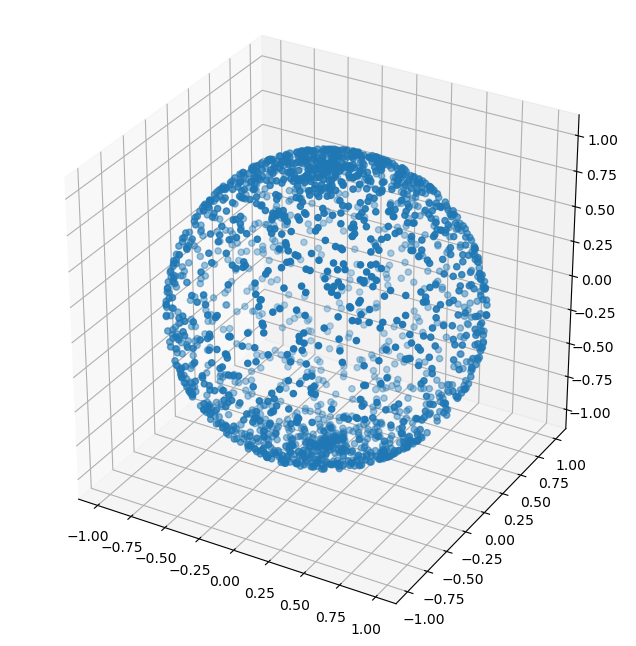

In [89]:
# generujemy pozycje na sferze (x,y,z)
points = zip(thetas,phis)
ps = map(position, points)
ps = np.array(list(ps))

# narysujmy 3d
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(projection='3d')
ax.set_box_aspect((1,1,1))  # ustaw rozmiary pudełka 1:1:1

ax.scatter(ps[:,0], ps[:,1], ps[:,2],".")
plt.show()

Wygląda dużo lepiej!

## 4.4 Ćwiczenie #4 - interferencja elektronów

Załóżmy, że mamy wiązkę elektronów przechodzącą przez dwie szczeliny oddalone od siebie o odległość $d$. Pytanie, jak wygląda rozkład zliczeń elektronów w zależności od położenia na dalekim ekranie.

Można to policzyć!

In [90]:
# użyj ponizszy kod do generowania prawdopodobienstwa

# Funkcja: prawdopodob(x, v, d, D, gorna_otwarta, dolna_otwarta, sigma)
# Zwraca: prawdopodobieństwo zliczenia detektora wokół x
# Uwaga: jako funkcja x nie jest unormowana, a więc jest tylko proporcjonalna do prawdopodobieństwa
#
#
# Zmienne:
# x - pozycja na detektorze
# v - prędkość elektronów
# d - odległośc pomiędzy szczelinami
# gorna_otwarta - True jeśli górna przegroda jest otwarta, False jeśli nie
# dolna_otwarta - True jeśli dolna przegroda jest otwarta, False jeśli nie



##
## KOD
##

# górna szczelina
def R_up(x, d, D):
  return np.sqrt((x-d/2)**2+D**2)

# dolna szczelina
def R_down(x, d, D):
  return np.sqrt((x+d/2)**2+D**2)

# amplituda przejścia z górnej szczeliny
def A_up(x, v, d, D, sigma):
  R = R_up(x, d, D)
  return np.exp(1.0j * v* R)/R * np.exp(-(x-d)**2/sigma**2)

# amplituda przejścia z dolnej szczeliny
def A_down(x, v, d, D, sigma):
  R = R_down(x, d, D)
  return np.exp(1.0j * v* R)/R * np.exp(-(x+d)**2/sigma**2)

def A(x, v, d, D, gorna_otwarta, dolna_otwarta, sigma):
  return gorna_otwarta * A_up(x, v, d, D, sigma) + dolna_otwarta * A_down(x, v, d, D, sigma)

def prawdopodob(x, v, d, D, gorna_otwarta, dolna_otwarta, sigma):
  return np.abs(A(x, v, d, D, gorna_otwarta, dolna_otwarta, sigma))**2

### Ćwiczenie #4 - rozwiązanie


In [91]:
import numpy as np

In [92]:
# uzyj ponizszy kod do generowania prawdopodobienstwa

# Funkcja: prawdopodob(x, v, d, D, gorna_otwarta, dolna_otwarta, sigma)
# Zwraca: prawdopodobieństwo zliczenia detektora wokół x
# Uwaga: jako funkcja x nie jest unormowana, a więc jest tylko proporcjonalna do prawdopodobieństwa
#
#
# Zmienne:
# x - pozycja na detektorze
# v - prędkość elektronów
# d - odległośc pomiędzy szczelinami
# gorna_otwarta - True jeśli górna przegroda jest otwarta, False jeśli nie
# dolna_otwarta - True jeśli dolna przegroda jest otwarta, False jeśli nie



##
## KOD
##

# górna szczelina
def R_up(x, d, D):
  return np.sqrt((x-d/2)**2+D**2)

# dolna szczelina
def R_down(x, d, D):
  return np.sqrt((x+d/2)**2+D**2)

# amplituda przejścia z górnej szczeliny
def A_up(x, v, d, D, sigma):
  R = R_up(x, d, D)
  return np.exp(1.0j * v* R)/R * np.exp(-(x-d)**2/sigma**2)

# amplituda przejścia z dolnej szczeliny
def A_down(x, v, d, D, sigma):
  R = R_down(x, d, D)
  return np.exp(1.0j * v* R)/R * np.exp(-(x+d)**2/sigma**2)

def A(x, v, d, D, gorna_otwarta, dolna_otwarta, sigma):
  return gorna_otwarta * A_up(x, v, d, D, sigma) + dolna_otwarta * A_down(x, v, d, D, sigma)

def prawdopodob(x, v, d, D, gorna_otwarta, dolna_otwarta, sigma):
  return np.abs(A(x, v, d, D, gorna_otwarta, dolna_otwarta, sigma))**2

In [98]:
D = 40.0
d = 1.0
v = 20.0

Nm=1000
L = 100
xs = np.linspace(-L,L,Nm)
sigma = 40.0 # kolimacja

czy_gorna_otwarta = True
czy_dolna_otwarta = True # zmień "True" na "not True"

ps = [prawdopodob(x, v, d, D, czy_gorna_otwarta, czy_dolna_otwarta, sigma) for x in xs]

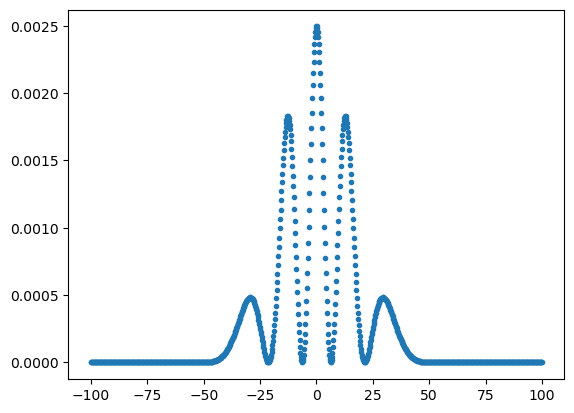

In [99]:
import matplotlib.pyplot as plt

plt.plot(xs, ps,".")
plt.show()

Dlaczego dostajemy coś takiego?
Jak wyglądają zliczenia na detektorze?

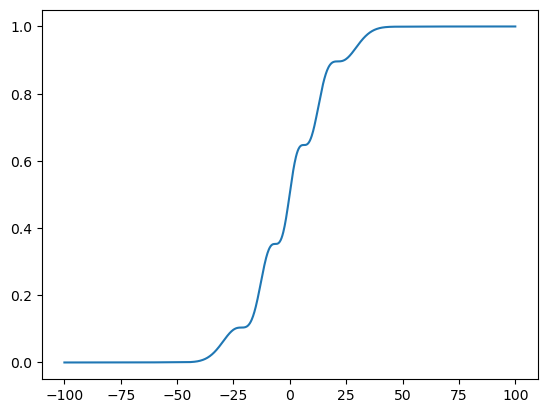

In [100]:
Ps = ps/np.sum(ps)

cPs = Ps.cumsum()

plt.plot(xs,cPs)

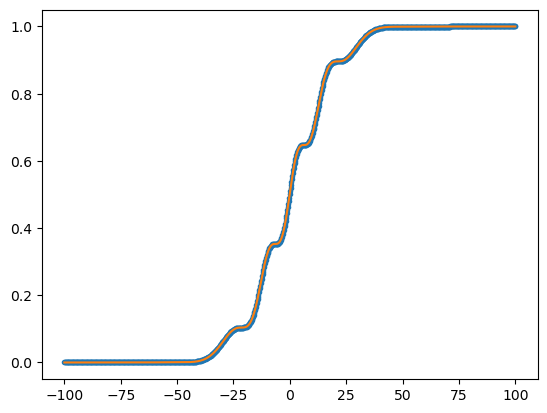

In [101]:
from scipy.interpolate import interp1d

# interpolujemy
it_cPs = interp1d(xs, cPs, kind="cubic")

plt.plot(xs,cPs, ".", label="original")
plt.plot(xs,it_cPs(xs), label="interpolated")

In [105]:
# odwracamy relację

genPos = interp1d(cPs, xs, kind="cubic")

# generujemy liczby losowe
seed=12345
generator = np.random.default_rng(seed)

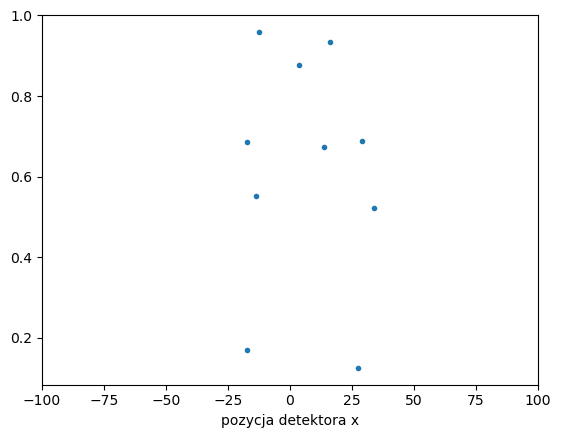

In [109]:
# ile elektronów?
Nelektronow = 10 # ustaw na 10000 !

# generujemy zliczenia elektronow
us = generator.uniform(0,1,size=Nelektronow)
pos = genPos(us)
zs = generator.uniform(0,1,size=Nelektronow)

plt.plot(pos,zs, ".")
plt.xlim(-L,L)
plt.xlabel("pozycja detektora x")
plt.show()

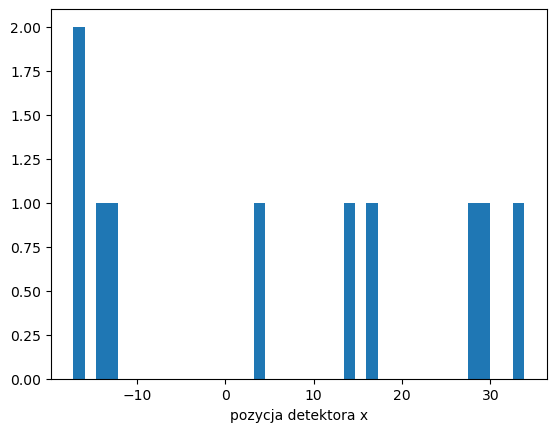

In [110]:
plt.hist(pos,bins=40)
plt.xlabel("pozycja detektora x")
plt.show()

## 4.5 Ćwiczenie #5 - obliczanie liczby $\pi$


Chcemy policzyć $I = \iint_\mathrm{koło} d^2r = \pi r^2$.
Zapisujemy $\iint_\mathrm{koło} d^2r = \iint_\mathrm{koło} d^2r f(x,y)$,
gdzie $f(x,y) = 1$ jeśli punkt $(x,y)$ jest w kole, oraz $f(x,y) = 0$ jeśli punkt $(x,y)$ jest poza kołem.
Teraz możemy rozciągnąć całkowanie na obszar kwadratu K: $-r \leqslant x,y \leqslant r$. I zapisać, że
$$I = \iint_K f(x,y) = (2r)^2 \iint_K f(x,y) \frac{1}{(2r)^2}$$
Oznacza to, że liczymy średnią:
$$I = \langle f(x,y )\rangle$$
gdzie rozkładem jest jednorodny rozklad
$$p(x,y) = \frac{1}{(2r)^2}.$$


**Sprawdźmy jak to działa.**

Chcemy policzyć pole koła o promieniu $r=1$.
Losujemy liczby losowe w kwadracie $-1 \leqslant x \leqslant 1$ i $-1 \leqslant y \leqslant 1$, w którym koło się zawiera.

Akceptujemy tylko te punkty, które wpadają do koła.

In [ ]:
# wpisz kod
# ...
# ...
# ...

### Ćwiczenie #5 - rozwiązanie

In [111]:
def f(x,y):
  if x**2+y**2<=1:
    return 1.0
  else:
    return 0.

In [112]:
# losujemy punkty z kwadratu K

Nm=10**4
xs = generator.uniform(-1,1,size=Nm)
ys = generator.uniform(-1,1,size=Nm)

pts = np.empty(len(xs))
for i in range(len(xs)):
  pts[i] = f(xs[i],ys[i])

In [113]:
print(f"Liczba pi wynosi = {4*pts.mean()}")
print(f"Błąd obliczenia pi wynosi = {4*pts.std()/np.sqrt(Nm)}")

Liczba pi wynosi = 3.1552
Błąd obliczenia pi wynosi = 0.016326398745589915


In [114]:
# Zdefiniujmy teraz generator liczby pi

def gen_pi(Nm):
  xs = generator.uniform(-1,1,size=Nm)
  ys = generator.uniform(-1,1,size=Nm)

  pts = np.empty(len(xs))
  for i in range(len(xs)):
    pts[i] = f(xs[i],ys[i])

  return 4*pts.mean()

Średnia z obliczonych liczb pi = 3.1419384000000004.
Oszacowany błąd obliczenia liczby pi = 0.004653072688020216.
Błąd = 0.0003457464102072372.


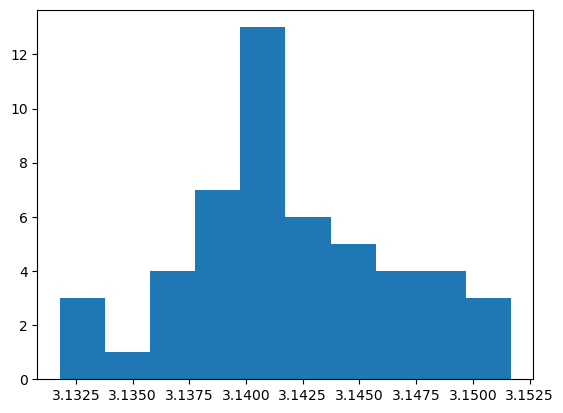

In [118]:
# wylosujmy dużo liczb pi, aby zobaczyć jaki popelniamy błąd

many_pi = [gen_pi(10**5) for i in range(50)]

# nasze oszacowanie liczby pi
pi_wynik = np.mean(many_pi)

plt.hist(many_pi)
print(f"Średnia z obliczonych liczb pi = {pi_wynik}.")
print(f"Oszacowany błąd obliczenia liczby pi = {np.std(many_pi)}.")
print(f"Błąd = {pi_wynik - np.pi}.")

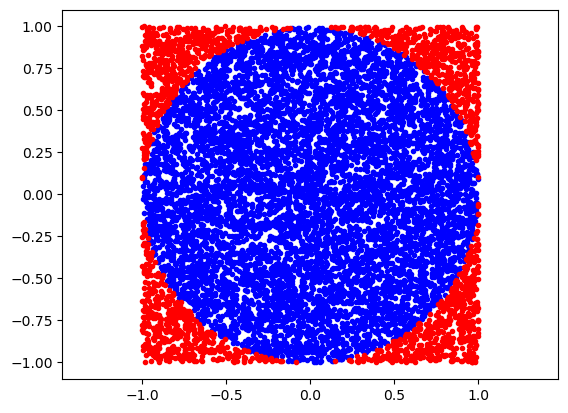

In [119]:
# jakie punkty bierzemy do zliczenia liczby 1 (niebieskie) a jakie nie (czerowne)?
inside=pts>0.5
outside=pts<0.5

plt.plot(xs[inside],ys[inside], "b.")
plt.plot(xs[outside],ys[outside], "r.")
plt.axis('equal')
plt.show()

# 5. Obca cząstka w ośrodku - ruchy Browna

Wyobraźmy sobie, że w płynie umieszczone zostało ziarenko pyłku kwiatu. Czy coś można powiedzieć o ruchach takiego ziarenka?

Ruch takiego pyłku opisuje równanie Langevina:
$$ \frac{d^2}{dt^2}{x(t)} + \gamma \frac{d}{dt}{x(t)} = \xi(t),$$
gdzie $\gamma$ jest związana z lepkością cieczy i dyssypacją energii, a $\xi$ to siła działająca na pyłek.
Przyjmujemy tu jednostkową masę ciała $m=1$, dlatego nie pojawia się w równaniu Newtona.

Siła jest siłą losową, która pochodzi od zderzeń pyłku z cząstkami otaczającego go płynu.
Jej funkcja korelacji
$$ \langle \xi(t)\xi(t')\rangle = 2 \gamma k_B T. $$

Zauważmy, że losowa siła odpowiada za fluktuacje położenia i prędkości, ale pojawia się w niej również współczynnik $\gamma$. Jest to przejaw twierdzenia fluktuacyjno-dyssypacyjnego, które łączy losową siłę oraz dyssypację energii w układzie.

Jak to rozwiązać?


Zapiszmy równania najpierw, wprowadzając $dx(t)/dt = v(t)$ prędkość, jako:
$$
Y(t) = \begin{pmatrix}
x(t) \\
v(t)
\end{pmatrix}
$$

Możemy wtedy zapisać
$$\frac{d Y(t)}{dt} = A \cdot Y(t) +
\begin{pmatrix}
0 \\
\xi(t)
\end{pmatrix}
$$.

Najprościej można to rozwiązać dyskretyzując równanie dla kroków $n\cdot \Delta t$:
$$Y_{n+1} = Y_n + A\cdot Y_n + W_n.$$
Okazuje się, że $W_n$ i $W_{n'}$ są gaussowskie, niezależne oraz $\langle W_n\rangle=0$ i $\langle W_n^2\rangle= 2 \gamma k_B T \Delta t$.

In [120]:
# Oznaczmy Y(t) = [x(t), v(t)]
# Pamiętajmy, że Y to nie jest wektor kolumnowy.

seed=12345
generator = np.random.default_rng(seed)


def propagate(steps, dt, x0, v0, gamma, Gamma):
  Y = np.array([x0, v0])
  A = np.array([[0,1],[0, -gamma]])

  xis = np.sqrt(dt*Gamma)*generator.normal(0,1, size=steps)
  Ys = np.empty(shape=(steps+1, 2))
  Ys[0] = [x0,v0]

  for i in range(steps):
    Ys[i+1] = Ys[i] + Ys[i]@ (A.transpose()) * dt + np.array([0, xis[i]])

  return Ys

In [121]:
dt = 0.01
x0 = 0.0
v0 = 0.0
gamma = 2.0
Temp = 10.0
Gamma = 2*gamma*Temp
steps = 300

trajs = [ propagate(300, dt, x0, v0, gamma, Gamma) for n in range(1000)]

In [122]:
NPtrajs=np.array(trajs)

In [123]:
NPtrajs[0,0:10]

array([[ 0.        ,  0.        ],
       [ 0.        , -0.90050602],
       [-0.00900506, -0.08324385],
       [-0.0098375 , -0.6322338 ],
       [-0.01615984, -0.78350467],
       [-0.02399488, -0.81548587],
       [-0.03214974, -1.26775275],
       [-0.04482727, -2.10746576],
       [-0.06590193, -1.6549206 ],
       [-0.08245113, -1.39346898]])

Final time t = 3.0


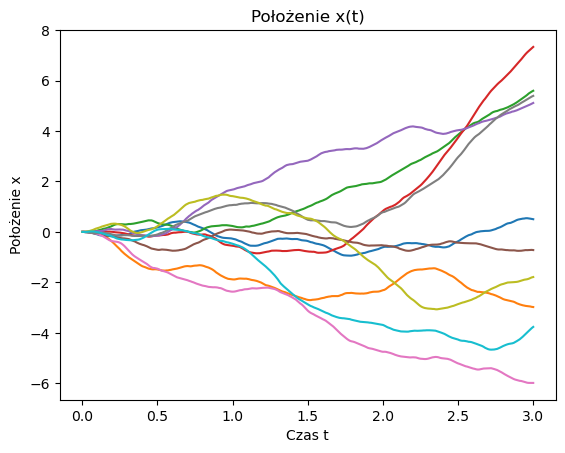

In [124]:
ts = np.arange(NPtrajs.shape[1])*dt
print(f"Final time t = {ts[-1]}")

import matplotlib.pyplot as plt

for i in range(0,10):
  plt.plot(ts, NPtrajs[i,:,0])
plt.xlabel("Czas t")
plt.ylabel("Położenie x")
plt.title("Położenie x(t)")
plt.show()

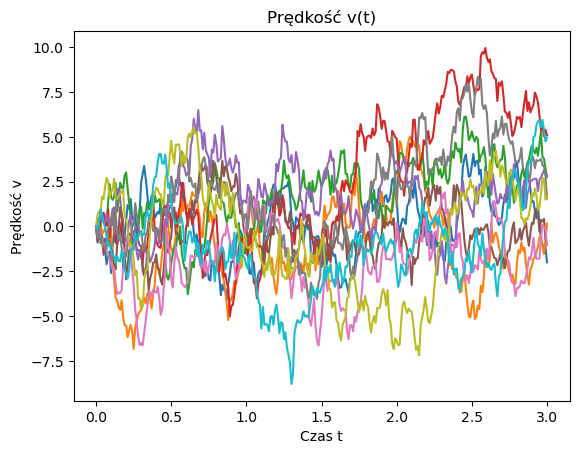

In [125]:
for i in range(0,10):
  plt.plot(ts, NPtrajs[i,:,1])
plt.xlabel("Czas t")
plt.ylabel("Prędkość v")
plt.title("Prędkość v(t)")
plt.show()

In [126]:
from scipy import stats

gs = stats.norm
def dist(v):
  return gs.pdf(v, loc=0, scale=np.sqrt(Temp))

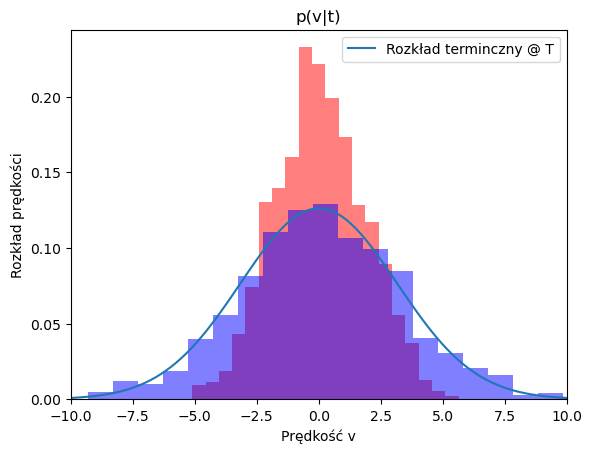

In [127]:
vs = np.linspace(-10,10,100)
plt.hist(NPtrajs[:,10,1], density=True, alpha=0.5, bins=20, color="r")
plt.hist(NPtrajs[:,-1,1], density=True, alpha=0.5, bins=20, color="b")
plt.plot( vs,  dist(vs), label="Rozkład terminczny @ T")
plt.legend()

plt.xlim(-10,10)

plt.xlabel("Prędkość v")
plt.ylabel("Rozkład prędkości")
plt.title("p(v|t)")
plt.show()

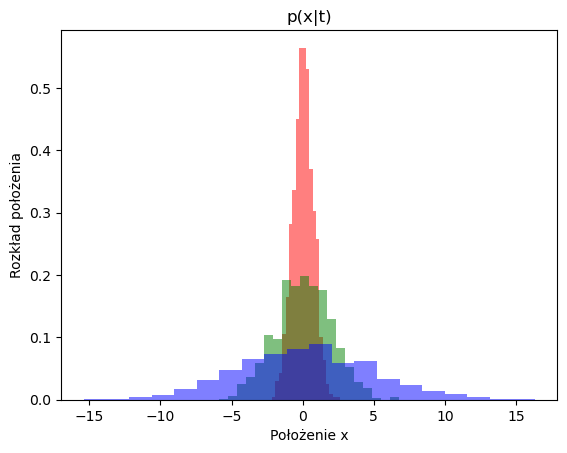

In [129]:
plt.hist(NPtrajs[:,40,0], density=True, bins=20, alpha=0.5, color="r")
plt.hist(NPtrajs[:,100,0], density=True, bins=20, alpha=0.5, color="g")
plt.hist(NPtrajs[:,-1,0], density=True, bins=20, alpha=0.5,  color="b")

plt.xlabel("Położenie x")
plt.ylabel("Rozkład położenia")
plt.title("p(x|t)")
plt.show()

# 6. Kwantowe trajektorie

In [130]:
# instalujemy qutip
!pip install qutip

In [131]:
import matplotlib.pyplot as plt
import numpy as np
from qutip import basis, destroy, expect, mcsolve, mesolve, steadystate

Mamy $n$ fotonów we wnęce optycznej. Na skutek oddziaływania z otoczeniem, które jest w niezerowej temperaturze, fotony mogą wyciekać z wnęki i do niej wracać.

In [132]:
# Ustalamy bazę, sprzężenie z otoczeniem, liczbę fotonów w otoczeniu

N = 6  # liczba elementów bazy do rozważenia
kappa = 10.  # sprzężenie z otoczeniem
nthermal = 0.1*5  # tepmeratura, która prowadzi do rozkładu fotonów w otoczeni ze średnią liczbą fotonów: <n>=0.1

# Próbkujemy dynamikę w tych czasach:
ts = np.linspace(0, 1.0, 100)

In [133]:
# ustalamy liczbę fotonów we wnęce
nphoton = 4

a = destroy(N)  # operator anihilacji fotonu we wnęce
H = a.dag() * a  # Hamiltonian fotonu we wnęce
psi0 = basis(N, nphoton)  # Stan początkowy z jakąś liczbą fotonów |nphoton>

In [134]:
# lista operatorów kolapsu
c_ops = []

# operator kolapsu
c_ops.append(np.sqrt(kappa * (1 + nthermal)) * a)

# operator wzbudzenia
c_ops.append(np.sqrt(kappa * nthermal) * a.dag())

In [135]:
# Liczba trajektori po których chcemy dokonać uśrednienia
trajektorie = [1, 2, 50, 100, 1024]

mc = mcsolve(H, psi0, ts, c_ops, [a.dag() * a], trajektorie)

10.1%. Run time:   0.43s. Est. time left: 00:00:00:03
20.0%. Run time:   0.81s. Est. time left: 00:00:00:03
30.1%. Run time:   1.15s. Est. time left: 00:00:00:02
40.0%. Run time:   1.50s. Est. time left: 00:00:00:02
50.0%. Run time:   1.89s. Est. time left: 00:00:00:01
60.1%. Run time:   2.21s. Est. time left: 00:00:00:01
70.0%. Run time:   2.54s. Est. time left: 00:00:00:01
80.1%. Run time:   2.87s. Est. time left: 00:00:00:00
90.0%. Run time:   3.21s. Est. time left: 00:00:00:00
100.0%. Run time:   3.52s. Est. time left: 00:00:00:00
Total run time:   3.53s


In [136]:
# rozwiązujemy równanie dla fotonów i sprawdzamy, ile średnio mamy fotonów we wnęce
me = mesolve(H, psi0, ts, c_ops, [a.dag() * a])

# stan stacjonarny
final_state = steadystate(H, c_ops)

# średnia liczba fotonów we wnęce <n>
n_srednie = expect(a.dag() * a, final_state)

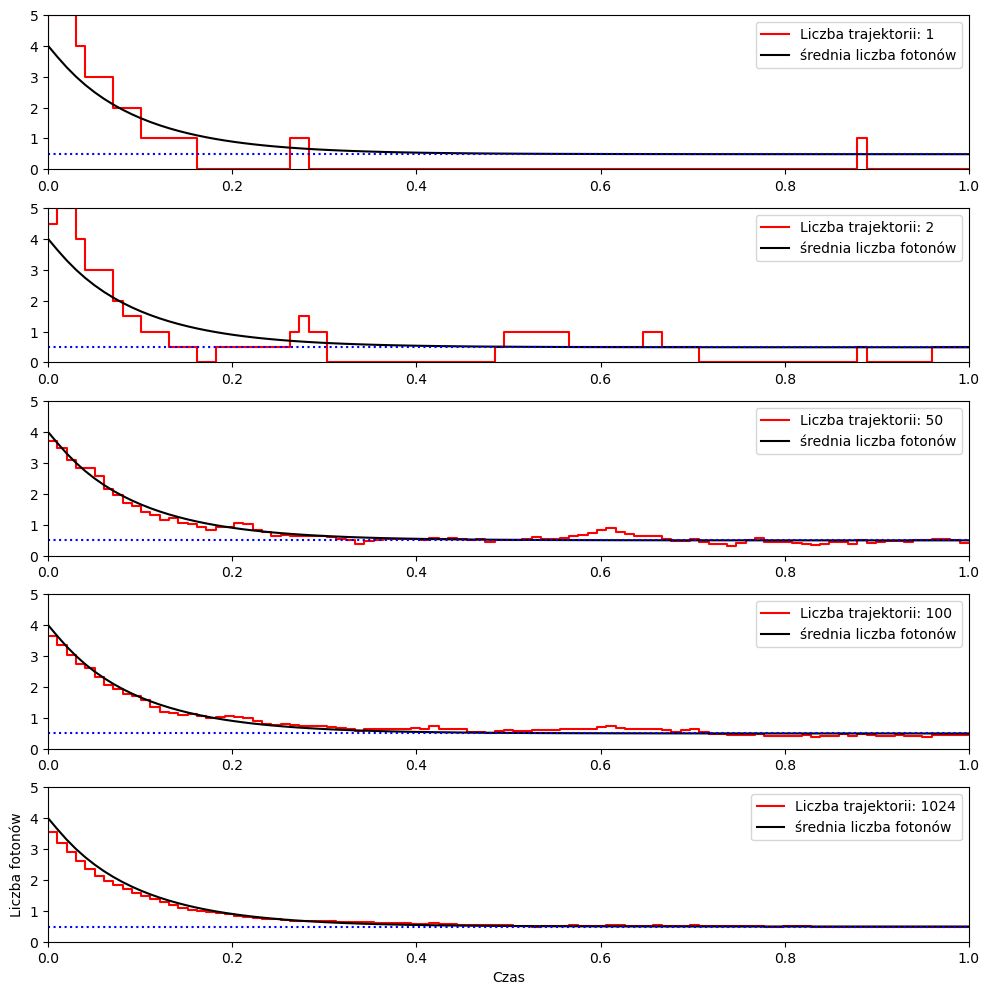

In [138]:
plt.figure(figsize=(10,10))
ymax = nphoton*0+5


for idx, ntrajs in enumerate(trajektorie):
  plt.subplot(len(trajektorie), 1, idx+1)
  plt.step(ts, mc.expect[idx][0], "r-", label=f"Liczba trajektorii: {ntrajs}")
  plt.ylim(0, ymax)
  plt.xlim(0, ts[-1])
  plt.plot(ts, me.expect[0], "k-", label="średnia liczba fotonów")
  plt.axhline(y=n_srednie, color="b", linestyle="dotted")
  plt.legend()


plt.xlabel("Czas")
plt.ylabel("Liczba fotonów")
plt.tight_layout()
plt.show()

# 7. Podwójna studnia potencjału

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import special
import scipy as sc

## 7.1 Algorytm

In [4]:
##
## Skład:
##

# Cplus(j, jz)
# Cminus(j, jz)
# generateJx(j)
# generateJx_v2(j):


##
## Funkcje
##

# definicja funkcji C_{+/-}(j_z)
def Cplus(j, jz):
  return np.sqrt( j*(j+1) - jz*(jz + 1) )

def Cminus(j, jz):
  return np.sqrt( j*(j+1) - jz*(jz - 1) )


##
## Generowanie macierzy <j_z|J_x|j_z'> dla zadanej liczby atomów N_A = Na
##

#
# Generowanie macierzy Jx
#
def generateJx(j):
  js = np.arange(-j, j+1)
  Cpluss = Cplus(j, js)
  CplusMat = np.diag(Cpluss[:-1], k=-1)
  return (CplusMat + CplusMat.T)/2

#
# Generowanie macierzy of Jy
#
def generateJy(j):
  js = np.arange(-j, j+1)
  Cpluss = Cplus(j, js)
  CplusMat = np.diag(Cpluss[:-1], k=-1)
  return (CplusMat - CplusMat.T)/(2.0j)

#
# Generowanie macierzy of Jz
#
def generateJz(j):
  js = np.arange(-j, j+1)
  res = np.diag(js)
  return res


##
## Generowanie C_m(t)
##

# Runge Rutta RK4 z krokiem h
# Cin to dane wejściowe

def RKstep(Cin, h):
  def F(y):
    return (-1j)*Heff@(y.T)

  k1 = F(Cin)
  k2 = F(Cin + h*k1/2)
  k3 = F(Cin + h*k2/2)
  k4 = F(Cin + h*k3)
  return Cin + (h/6)*(k1 + 2*k2 + 2*k3 + k4)


# Algorytm do ewolucji funkcji falowej aż do czasu t:
def evolve(Nmt, Na, psi_init):
  psis = np.empty(shape=(Nmt, Na+1), dtype=complex)
  psis[0] = psi_init
  for i in range(len(ts)-1):
    psis[i+1] = RKstep(psis[i], dt)
  return psis

## 7.2 Dane, energia, stan początkowy

In [5]:
##
## Dane wejściowe
##

# liczba atomów w układzie
Na = 20

# Parametry w Hamiltonianie
Et = 1.0                # Energia tunelowania
U = 0.05                # oddziaływanie atom-atom

# maksymalny rzut momentu pędu w mapowaniu atom <-> momentu pęd
j = Na/2

# wektor jz = -J, -J+1, ..., J-1, J
js = np.arange(-j, j+1)

In [6]:
# Generujemy macierz Jx
Jxs = generateJx(j)
Jys = generateJy(j)
Jzs = generateJz(j)

In [7]:
# Hamiltonian opisujący tunelowanie
H_J = -Et*Jxs
H_JL = 0.5*U*( np.diag(js**2) )
Heff = H_J + H_JL

In [8]:
# Tworzymy siatkę (grid) czasowy
Nmt = 4000      # liczba punktów w czasie
tfin = 1*150.      # ostateczny czas # ustawmy teraz czas tfin: tfind =2*150

# grid: ts = (0, dt, 2dt, ...)
ts = np.linspace(0, tfin, Nmt)

# krok czasowy
dt = ts[1]-ts[0]

print(f"Krok czaowy: {dt}")
print(f"10 pierwszych elementów:\n{ts[:10]}")

Krok czaowy: 0.037509377344336084
10 pierwszych elementów:
[0.         0.03750938 0.07501875 0.11252813 0.15003751 0.18754689
 0.22505626 0.26256564 0.30007502 0.3375844 ]


In [9]:
##
## początkowa funkcja falowa w t=0
##

# #1: stan koherentny state
psi_init_coh = np.empty(shape=(Na+1), dtype=complex)
psi_init_coh[::] = (1/2**(Na/2)) * np.sqrt(sc.special.binom(Na, js+Na/2))

# #2: wszystko w jednym oczku pułapki, tylko jz = +N_A/2 jest zapełnione
psi_init_imb = np.empty(shape=(Na+1), dtype=complex)
psi_init_imb[::] = 0
psi_init_imb[-1] = 1


##
## Wybierz funkcję falową:
##
#psi_init = psi_init_coh
psi_init = psi_init_imb

In [10]:
# sprawzdzamy normalizację <psi|psi> = 1
psi_init.conj() @ psi_init

(1+0j)

## 7.3 Ewolucja

In [11]:
%%time

# Ewoluujemy!
psis = evolve(Nmt, Na, psi_init)

CPU times: user 222 ms, sys: 4.04 ms, total: 226 ms
Wall time: 224 ms


In [12]:
# Obliczmy ile jaka jest średnia różnica liczby atomów w każdej studni: <J_z(t)>

mean_Jz = [psis[n].conj() @ (Jzs @ psis[n]) for n in np.arange(len(ts))]

## 7.4 Wykres

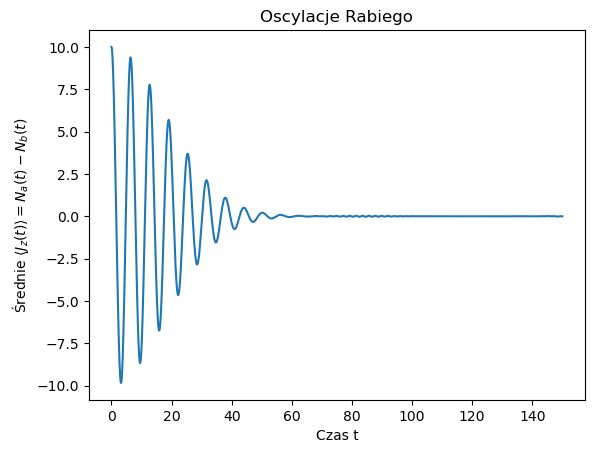

In [13]:
# Narysujmy to <J_z(t)>
plt.plot(ts, np.real(mean_Jz), "-")
plt.xlabel("Czas t")
plt.ylabel(r"Średnie $\langle J_z(t) \rangle  = N_a(t) - N_b(t) $")
plt.title(r"Oscylacje Rabiego")
plt.show()

Wrócmy teraz do parametru `tfin` i ustawmy dłuższy czas.  
Co się pojawi?  
To zjawisko, kiedy średnia nie jest równa zero w tym przypadku nazywa się 'quantum revival'.

# Podziękowania

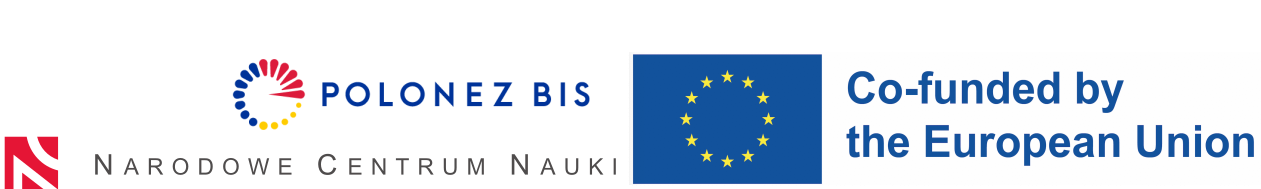